<h1 style="text-align:center"><b> An Overview of Medicinal utilization by all four regions of USA  </b></h1>
<h2 style="text-align:center"> Exploratory data analysis | Data Transformation | Data Visualization </h2><br>
<h2> Importing Libraries and Packages </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset

In [2]:
d_data = pd.read_csv("https://download.medicaid.gov/data/state-drug-utilization-data2022.csv")

In [3]:
d_data.shape

(2684933, 15)

In [4]:
display(d_data)

,utilization_type,state,ndc,labeler_code,product_code,package_size,year,quarter,suppression_used,product_name,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
0,FFSU,AK,2143380,2,1433,80,2022,2,False,TRULICITY,513.0,224.0,219439.82,217084.70,2355.12
1,FFSU,AK,2143401,2,1434,1,2022,2,True,TRULICITY,NaN,NaN,NaN,NaN,NaN
2,FFSU,AK,2143480,2,1434,80,2022,2,False,TRULICITY,712.0,281.0,304228.76,298845.11,5383.65
3,FFSU,AK,2143611,2,1436,11,2022,2,False,EMGALITY P,28.0,27.0,17785.15,16658.27,1126.88
4,FFSU,AK,2144509,2,1445,9,2022,2,True,TALTZ AUTO,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684928,MCOU,DE,78206016201,78206,162,1,2022,1,True,RENFLEXIS,NaN,NaN,NaN,NaN,NaN
2684929,MCOU,DE,78206017801,78206,178,1,2022,1,True,ZETIA 10MG,NaN,NaN,NaN,NaN,NaN
2684930,MCOU,DE,78670013102,78670,131,2,2022,1,True,SYMJEPI (E,NaN,NaN,NaN,NaN,NaN
2684931,MCOU,DE,80705010030,80705,100,30,2022,1,True,ELEPSIA XR,NaN,NaN,NaN,NaN,NaN


In [5]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684933 entries, 0 to 2684932
Data columns (total 15 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   utilization_type                object 
 1   state                           object 
 2   ndc                             int64  
 3   labeler_code                    int64  
 4   product_code                    int64  
 5   package_size                    int64  
 6   year                            int64  
 7   quarter                         int64  
 8   suppression_used                bool   
 9   product_name                    object 
 10  units_reimbursed                float64
 11  number_of_prescriptions         float64
 12  total_amount_reimbursed         float64
 13  medicaid_amount_reimbursed      float64
 14  non_medicaid_amount_reimbursed  float64
dtypes: bool(1), float64(5), int64(6), object(3)
memory usage: 289.3+ MB


## Data Cleaning and Manipulation
### Removing Missing values  

In [6]:
d_data.dropna(inplace = True)
display(d_data)

,utilization_type,state,ndc,labeler_code,product_code,package_size,year,quarter,suppression_used,product_name,units_reimbursed,number_of_prescriptions,total_amount_reimbursed,medicaid_amount_reimbursed,non_medicaid_amount_reimbursed
0,FFSU,AK,2143380,2,1433,80,2022,2,False,TRULICITY,513.00,224.0,219439.82,217084.70,2355.12
2,FFSU,AK,2143480,2,1434,80,2022,2,False,TRULICITY,712.00,281.0,304228.76,298845.11,5383.65
3,FFSU,AK,2143611,2,1436,11,2022,2,False,EMGALITY P,28.00,27.0,17785.15,16658.27,1126.88
5,FFSU,AK,2144511,2,1445,11,2022,2,False,TALTZ AUTO,22.00,19.0,139350.50,139350.50,0.00
8,FFSU,AK,2223680,2,2236,80,2022,2,False,TRULICITY,286.00,112.0,122299.72,118895.05,3404.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684917,MCOU,DE,78206011501,78206,115,1,2022,1,False,ASMANEX TW,1.89,12.0,1253.98,1253.98,0.00
2684921,MCOU,DE,78206012601,78206,126,1,2022,1,False,DULERA 200,494.00,38.0,12066.81,10704.88,1361.93
2684923,MCOU,DE,78206012701,78206,127,1,2022,1,False,DULERA 100,429.00,33.0,10458.63,9916.55,542.08
2684925,MCOU,DE,78206014501,78206,145,1,2022,1,False,NEXPLANON,90.00,90.0,68518.90,66490.14,2028.76


In [7]:
d_data.shape

(1367205, 15)

We will be removing **'XX'** Location as it is considered to be _"National Totals"_ and _"Annual State Detail"_ which will not be useful for our analysis as we are focussing on comparision between different regions. Hence, "National Totals" data will be not considered and involved in our analysis report.

In [8]:
exclude_locations = ['XX']

d_data = d_data[~d_data['state'].isin(exclude_locations)]
d_data.shape

(1223480, 15)

In [9]:
d_data['state'].unique()

array(['AK', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA',
       'AL', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'AR',
       'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'AZ',
       'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'CA',
       'WI', 'WV', 'WY', 'CO', 'CT', 'DC', 'DE'], dtype=object)

### Categorizing states into major 'Regions' of USA 


In [10]:
def get_region(state):
    if state in ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']:
        return 'NorthEast'
    elif state in ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']:
        return 'MidWest'
    elif state in ['DE', 'MD', 'DC', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'KY', 'TN', 'AL', 'MS', 'AR', 'LA', 'TX', 'OK']:
        return 'South'
    elif state in ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI']:
        return 'West'
    else:
        return 'Other'

# Use .apply() and a lambda function to create a new column based on the 'state' value
d_data['Region'] = d_data['state'].apply(lambda x: get_region(x))

Creating seperate dataframes for **MCOU** and **FFSU** - Utilization type by _df_mcou & df_ffsu_ for filtering data.

In [11]:
df_ffsu = d_data.loc[d_data['utilization_type'] == 'FFSU']
df_mcou = d_data.loc[d_data['utilization_type'] == 'MCOU']

## Plot 1

Plot to represent the distribution of FFS utilization type for all four regions of USA

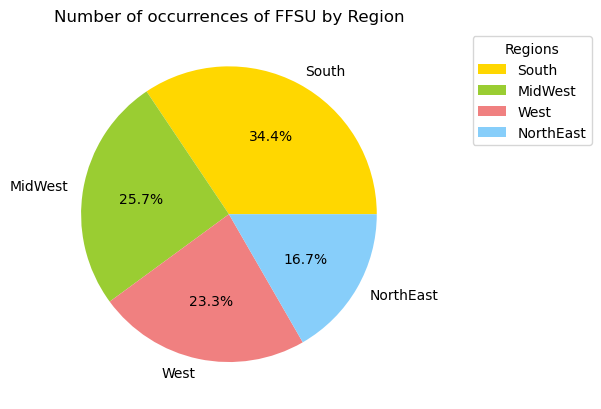

In [12]:
ffsu_pie = df_ffsu['Region'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(ffsu_pie, labels=ffsu_pie.index, autopct='%1.1f%%', colors=colors)
plt.legend(title='Regions', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'Number of occurrences of FFSU by Region')
plt.show()

## Plot 2

Plot to represent the distribution of MCO utilization type for all four regions of USA

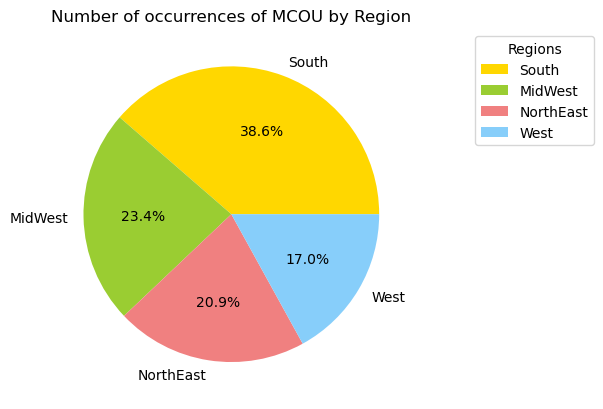

In [13]:
mcou_pie = df_mcou['Region'].value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

plt.pie(mcou_pie, labels=mcou_pie.index, autopct='%1.1f%%', colors=colors)
plt.legend(title='Regions', loc='best', bbox_to_anchor=(1, 0, 0.5, 1))
plt.title(f'Number of occurrences of MCOU by Region')
plt.show()

## Plot 3

Bar Plot to represent the medication units reimbursed over all four regions of USA

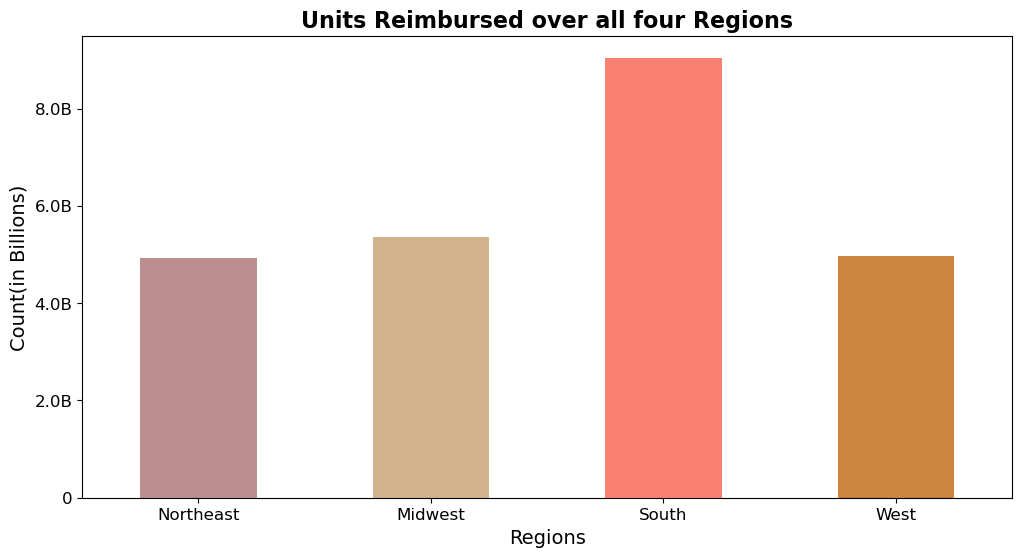

In [14]:
# Filter the data by region
northeast_df = d_data.loc[d_data['Region'] == 'NorthEast']
midwest_df = d_data.loc[d_data['Region'] == 'MidWest']
south_df = d_data.loc[d_data['Region'] == 'South']
west_df = d_data.loc[d_data['Region'] == 'West']

# Calculate the total units reimbursed for each region
northeast_count = northeast_df['units_reimbursed'].sum()
midwest_count = midwest_df['units_reimbursed'].sum()
south_count = south_df['units_reimbursed'].sum()
west_count = west_df['units_reimbursed'].sum()

# Create a pandas Series with the region counts
region_counts = pd.Series([northeast_count, midwest_count, south_count, west_count], index=['Northeast', 'Midwest', 'South', 'West'])

# Define the colors for the bar plot
colors = ['rosybrown', 'tan', 'salmon', 'peru']

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))
region_counts.plot(kind='bar', color=colors, ax=ax)

# Set the title and axis labels
plt.title('Units Reimbursed over all four Regions', fontsize=16, fontweight='bold')
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Count(in Billions)', fontsize=14)

# Customize the tick labels on the y-axis
def format_tick_value(tick_value, tick_pos):
	# Convert the tick value to a string
	tick_str = str(int(tick_value))
	
	# If the tick value is greater than 1 billion, divide it by 1 billion and append 'B'
	if tick_value >= 1e9:
		tick_str = '{:.1f}B'.format(tick_value / 1e9)
		
	return tick_str

formatter = ticker.FuncFormatter(format_tick_value)
ax.yaxis.set_major_formatter(formatter)

# Set the tick label font sizes
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## Plot 4

Bar Plot to represent the amount reimbursed over all four regions of USA

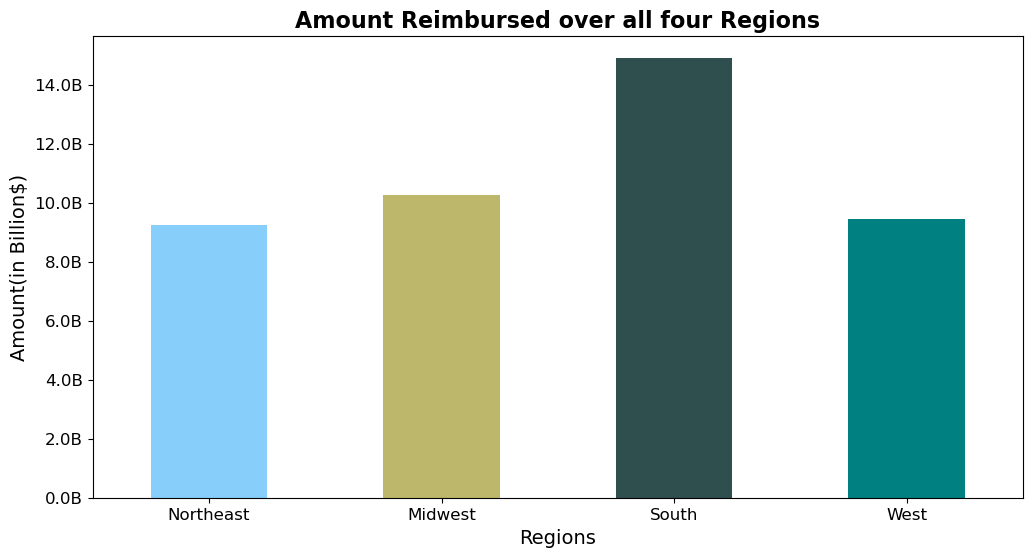

In [15]:
northeast_df = d_data.loc[d_data['Region'] == 'NorthEast']
midwest_df = d_data.loc[d_data['Region'] == 'MidWest']
south_df = d_data.loc[d_data['Region'] == 'South']
west_df = d_data.loc[d_data['Region'] == 'West']

# count the total amount reimbursed in each region
northeast_count = northeast_df['total_amount_reimbursed'].sum()
midwest_count = midwest_df['total_amount_reimbursed'].sum()
south_count = south_df['total_amount_reimbursed'].sum()
west_count = west_df['total_amount_reimbursed'].sum()

# plot the results
region_counts = pd.Series([northeast_count, midwest_count, south_count, west_count], index=['Northeast', 'Midwest', 'South', 'West'])
colors = ['lightskyblue', 'darkkhaki', 'darkslategrey', 'teal']
fig, ax = plt.subplots(figsize=(12, 6))
region_counts.plot(kind='bar', color=colors, ax=ax)
plt.title(f'Amount Reimbursed over all four Regions', fontsize=16, fontweight='bold')
plt.xlabel('Regions', fontsize=14)
plt.ylabel('Amount(in Billion$)', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# format the y-axis tick labels in billions
def format_tick_value(tick_value, tick_pos):
    tick_str = '{:.1f}B'.format(tick_value / 1e9)
    return tick_str

formatter = ticker.FuncFormatter(format_tick_value)
ax.yaxis.set_major_formatter(formatter)

plt.show()

## Plot 5

Stacked Bar Plot to represent total amount reimbursed over all four regions of USA

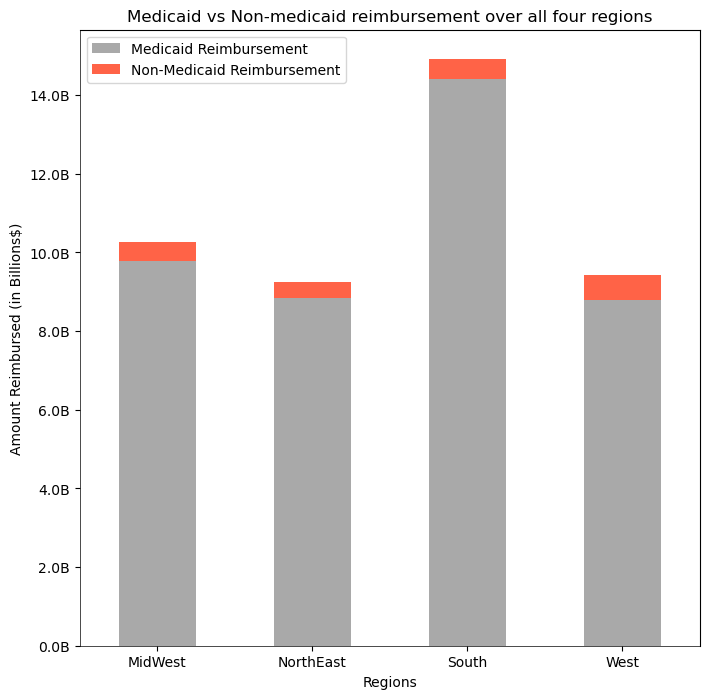

In [16]:
#Group the DataFrame by Region and sum the medicaid_amount_reimbursed and non_medicaid_amount_reimbursed columns
region_totals = d_data.groupby('Region')['medicaid_amount_reimbursed', 'non_medicaid_amount_reimbursed'].sum()

#Define the colors for each stacked bar
colors = ['darkgray', 'tomato']

#Create a stacked bar chart
fig, ax = plt.subplots(figsize=(8,8))
region_totals.plot.bar(stacked=True, color=colors, ax=ax)

#Set the chart title and axis labels
ax.set_title('Medicaid vs Non-medicaid reimbursement over all four regions')
ax.set_xlabel('Regions')
ax.set_ylabel('Amount Reimbursed (in Billions$)')

#Set the border properties
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

#Change the legend names
legend_labels = ['Medicaid Reimbursement', 'Non-Medicaid Reimbursement']
legend = ax.legend(legend_labels, loc='upper left')

# format the y-axis tick labels in billions
def format_tick_value(tick_value, tick_pos):
    tick_str = '{:.1f}B'.format(tick_value / 1e9)
    return tick_str

formatter = ticker.FuncFormatter(format_tick_value)
ax.yaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', labelrotation=0)

#Show the chart
plt.show()